In [2]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 512kB 39.0MB/s 
     |████████████████████████████████| 3.8MB 47.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5f4fac09a475e885c9f443cdd19ef2eb7a8b151f83937c57da8016730b5bb6b4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0041, accuracy: 0.87
epoch: 0042, accuracy: 0.87
epoch: 0042, accuracy: 0.87
epoch: 0042, accuracy: 0.87
epoch: 0042,

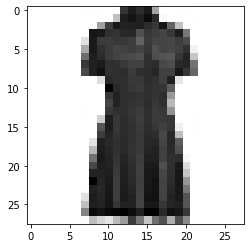

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/',
                                  source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',
                                  one_hot=True)
print("Training set (images): {}".format(mnist.train.images.shape))
print("Training set (labels): {}".format(mnist.train.labels.shape))
print("Test set (images): {}".format(mnist.test.images.shape))
print("Test set (labels): {}".format(mnist.test.labels.shape))

# input placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None , 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])
# weights and biases
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
Z1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
W2 = tf.Variable(tf.random_normal([ 256 , 10]))
b2 = tf.Variable(tf.random_normal([10]))
S2 = tf.matmul(Z1, W2) + b2

hypothesis = S2
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
corrects = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(corrects, tf.float32))

label_names = [
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# get 28 by 28 image
sample_1 = mnist.train.images[47].reshape(28, 28)

# get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(mnist.train.labels[47] == 1)[0][0]

# plot sample
print("y = {label_index} ({label})".format(
    label_index=sample_label_1, label=label_names[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 100

optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(EPOCHS):
    for _ in range(int(mnist.train.num_examples / BATCH_SIZE)):
      X_batch, Y_batch = mnist.train.next_batch(BATCH_SIZE)
      sess.run(optimizer, feed_dict={X: X_batch, Y: Y_batch})
      
      if (epoch+1) % 1 == 0:
        acc_val = sess.run( accuracy, 
                           feed_dict={X: mnist.test.images,Y: mnist.test.labels})
        print("epoch: {:04d}, accuracy: {:.2f}".format(epoch+1, acc_val))
  print("Learning finished.")

  pred_val = sess.run( hypothesis , feed_dict = {X: mnist.test.images, Y: mnist.test.labels})
  print(classification_report(mnist.test.labels.argmax(axis=1),
                                pred_val.argmax(axis=1), target_names=label_names))